In [146]:
%pip install seaborn
%pip install nltk
%pip install textatistic

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [147]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [148]:
df_essay = pd.read_csv('F23EssayDataForAnalysis.csv')
df_essay.columns

Index(['ID', 'Written By', 'Essay Prompt', 'Subject', 'Course Level', 'Grade',
       'GPTZero Prediction', 'GPTZero Score', 'ContentDetectorAI Prediction',
       'ContentDetectorAI Score', 'GPT2 Score', 'AcademicHelp Score',
       'Essay Text', 'AI Instructions'],
      dtype='object')

In [149]:
df_essay.head()

,ID,Written By,Essay Prompt,Subject,Course Level,Grade,GPTZero Prediction,GPTZero Score,ContentDetectorAI Prediction,ContentDetectorAI Score,GPT2 Score,AcademicHelp Score,Essay Text,AI Instructions
0,3474,"3- Partly written by me, partly by AI","""College Behind Bars"" explores the far-reachin...",English,100 or 200 level Undergraduate,A,Likely to be a mix of Human and AI,47,Likely Human with a few AI-like Sentences,58.00,1.00,55.0,"""College Behind Bars"" explores the far-reachin...","Analyze the movie, ""College Behind Bars."" Anal..."
1,5590,4- AI-generated,"World War II, which happened from 1939 to 1945...",History,12th Grade,NaN,Likely to be a mix of Human and AI,86,Likely AI,84.00,80.00,88.0,"World War II, which happened from 1939 to 1945...",Write me an 500-1000 word essay about world wa...
2,6657,1- Entirely written by me,"In terms relating to the American Dream, you c...",Other,300 or 400 level Undergraduate,A,Likely Written by Human,1,Likely Human with a few AI-like Sentences,32.61,0.02,0.0,"In terms relating to the American Dream, you c...",NaN
3,6486,1- Entirely written by me,Through our planet's cumulative and individual...,English,100 or 200 level Undergraduate,A,Likely Written by Human,0,Likely Human with a few AI-like Sentences,20.27,0.43,0.0,Through our planet's cumulative and individual...,NaN
4,7702,4- AI-generated,Discuss the ethical implications of workplace ...,Technology,100 or 200 level Undergraduate,n/a or prefer not to say,Likely Written by AI,90,Likely Human,45.56,0.03,52.3,In the rapidly evolving landscape of remote wo...,ChatGPT\n\nWrite an essay for an IT class with...


## Number of essays by Written By type

In [150]:
df_essay.groupby("Written By").ID.count()

Written By
1- Entirely written by me                           81
2- Written by me but grammar was corrected by AI    10
3- Partly written by me, partly by AI                8
4- AI-generated                                     84
Name: ID, dtype: int64

## Cross table of Essays by written by type and GPTZero Prediction
(This has the FP/FN values)

In [151]:

pd.pivot_table(data=df_essay,index='Written By',columns=['GPTZero Prediction'],values='ID',aggfunc='count')


GPTZero Prediction,Likely Written by AI,Likely Written by Human,Likely to be a mix of Human and AI,Other
Written By,,,,
1- Entirely written by me,4.0,57.0,19.0,1.0
2- Written by me but grammar was corrected by AI,2.0,1.0,6.0,1.0
"3- Partly written by me, partly by AI",3.0,2.0,3.0,NaN
4- AI-generated,66.0,2.0,15.0,NaN


## Cross table of Essays by written by type and ContentDetectorAI Prediction
(This has the FP/FN values)

In [152]:
pd.pivot_table(data=df_essay,index='Written By',columns=['ContentDetectorAI Prediction'],values='ID',aggfunc='count')


ContentDetectorAI Prediction,Likely AI,Likely Human,Likely Human with a few AI-like Sentences,May Have AI
Written By,,,,
1- Entirely written by me,4.0,60.0,10.0,6.0
2- Written by me but grammar was corrected by AI,NaN,6.0,3.0,1.0
"3- Partly written by me, partly by AI",1.0,4.0,2.0,1.0
4- AI-generated,26.0,26.0,10.0,21.0


## Average score by type

In [153]:
pd.pivot_table(data=df_essay,index='Written By',values=['GPTZero Score','ContentDetectorAI Score', 'GPT2 Score', 'AcademicHelp Score'],aggfunc='mean')


,AcademicHelp Score,ContentDetectorAI Score,GPT2 Score,GPTZero Score
Written By,,,,
1- Entirely written by me,14.137037,38.780000,9.300247,21.419753
2- Written by me but grammar was corrected by AI,14.673000,41.261000,12.155000,52.300000
"3- Partly written by me, partly by AI",27.180000,50.020000,28.750000,46.750000
4- AI-generated,56.210714,61.481905,17.122738,90.166667


## Distributions of Scores over all essays

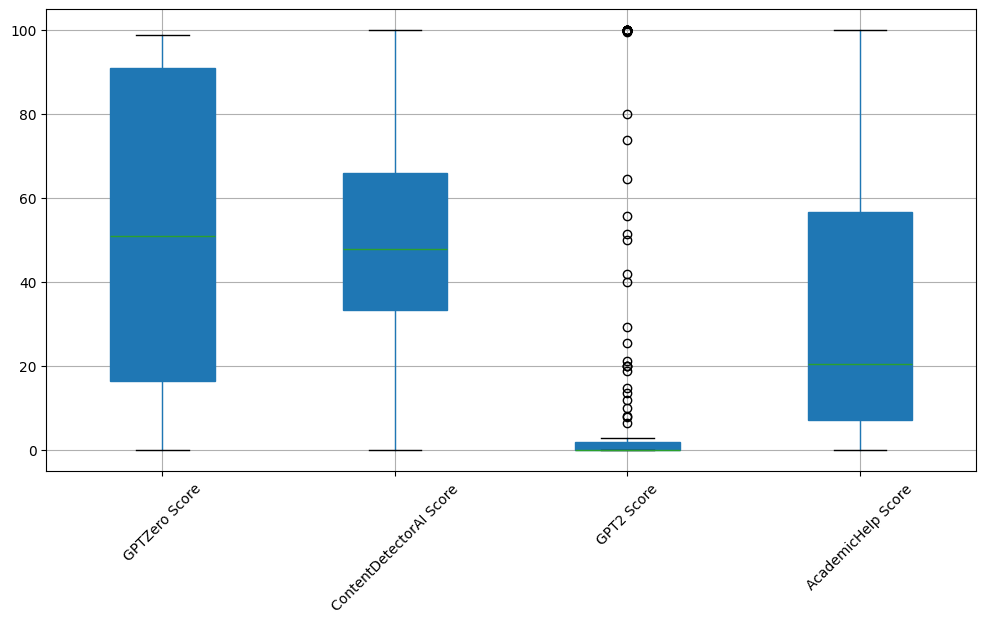

In [154]:
labels = ['GPTZero', 'ContentDetectorAI', 'GPT2', 'AcademicHelp']

boxplot = df_essay.boxplot(column=['GPTZero Score',
       'ContentDetectorAI Score', 'GPT2 Score', 'AcademicHelp Score'],
                           vert=True,  # vertical box alignment
          patch_artist=True,  # fill with color
        rot=45)  # rotate labels)
plt.show()          

### Comparison of GPTZero Scores by Written type

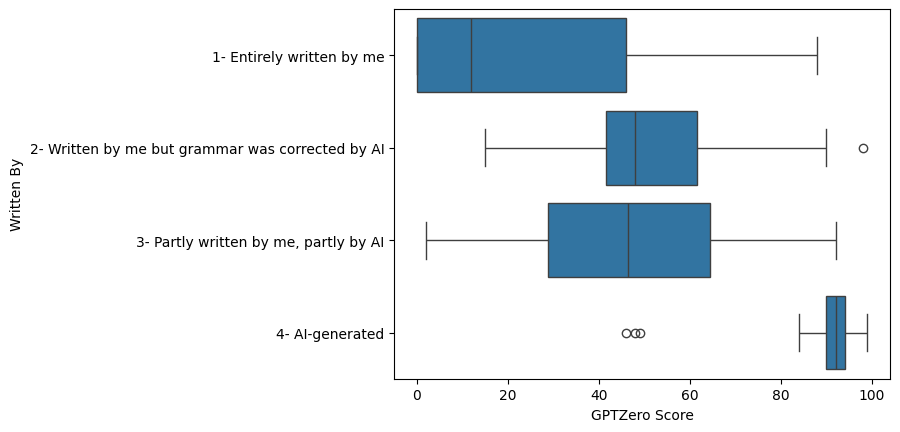

In [155]:
gptzero_boxplot = sns.boxplot(data=df_essay, x='GPTZero Score',y='Written By',
                              order=['1- Entirely written by me', '2- Written by me but grammar was corrected by AI','3- Partly written by me, partly by AI', '4- AI-generated'])
plt.show()

### Comparison of ContentDetector Scores by Written type

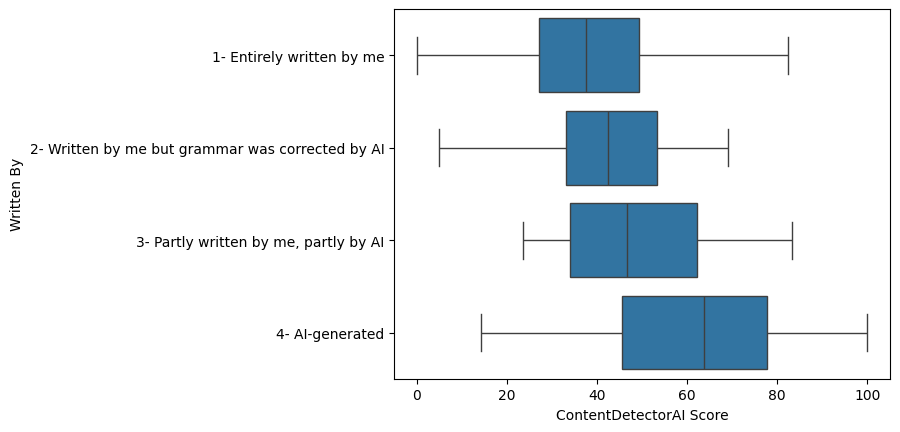

In [156]:
contentDetector_boxplot = sns.boxplot(data=df_essay, x='ContentDetectorAI Score',y='Written By',
                              order=['1- Entirely written by me', '2- Written by me but grammar was corrected by AI','3- Partly written by me, partly by AI', '4- AI-generated'])
plt.show()

### Comparison of GPT2 Scores by Written type

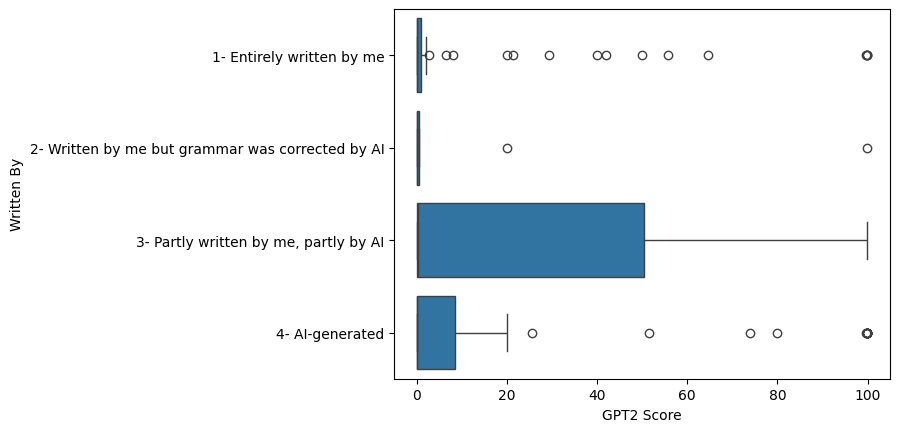

In [157]:
gpttwo_boxplot = sns.boxplot(data=df_essay, x='GPT2 Score',y='Written By',
                              order=['1- Entirely written by me', '2- Written by me but grammar was corrected by AI','3- Partly written by me, partly by AI', '4- AI-generated'])
plt.show()

### Comparison of AcademicHelp Scores by Written type

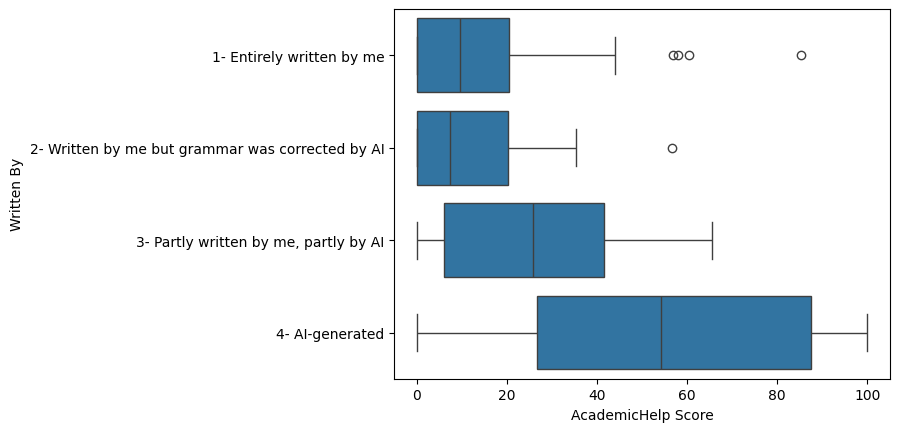

In [158]:
academichelp_boxplot = sns.boxplot(data=df_essay, x='AcademicHelp Score',y='Written By',
                              order=['1- Entirely written by me', '2- Written by me but grammar was corrected by AI','3- Partly written by me, partly by AI', '4- AI-generated'])
plt.show()

## Looking at False positives in detail

In [159]:
df_essay[(df_essay['Written By']=='1- Entirely written by me')&(df_essay['GPTZero Prediction']=='Likely Written by AI')]



,ID,Written By,Essay Prompt,Subject,Course Level,Grade,GPTZero Prediction,GPTZero Score,ContentDetectorAI Prediction,ContentDetectorAI Score,GPT2 Score,AcademicHelp Score,Essay Text,AI Instructions
68,6093,1- Entirely written by me,"Write a 5-7 page paper (12 point font, normal ...",Other,300 or 400 level Undergraduate,A,Likely Written by AI,46,May Have AI,71.05,6.45,26.66,This paper will focus mainly on the ideas of H...,NaN
89,8072,1- Entirely written by me,Prompt: Write a marketing critique on a recent...,Other,100 or 200 level Undergraduate,A,Likely Written by AI,48,Likely Human,14.47,0.03,20.60,The Barbie film's marketing team made quite th...,NaN
149,2820,1- Entirely written by me,"In George Orwell's novel ""1984,"" the character...",English,100 or 200 level Undergraduate,B,Likely Written by AI,48,Likely Human,20.21,21.31,0.00,"In the novel 1984, George Orwell analyzes the ...",NaN
162,4567,1- Entirely written by me,Write an essay about the art museum you have a...,Other,100 or 200 level Undergraduate,A,Likely Written by AI,47,Likely Human with a few AI-like Sentences,35.00,20.00,20.00,"The above painting is titled ""Head of a Skelet...",NaN


In [160]:
df_essay[(df_essay['Written By']=='1- Entirely written by me')&(df_essay['ContentDetectorAI Prediction']=='Likely AI')]


,ID,Written By,Essay Prompt,Subject,Course Level,Grade,GPTZero Prediction,GPTZero Score,ContentDetectorAI Prediction,ContentDetectorAI Score,GPT2 Score,AcademicHelp Score,Essay Text,AI Instructions
87,3714,1- Entirely written by me,The prompt was to write about a controversial ...,English,100 or 200 level Undergraduate,n/a or prefer not to say,Likely to be a mix of Human and AI,48,Likely AI,79.07,55.82,60.51,*Deleted a lot of text to fit the Academic Hel...,NaN
105,4473,1- Entirely written by me,Write a personal essay discussing the impact o...,History,100 or 200 level Undergraduate,A,Likely Written by Human,2,Likely AI,77.00,2.68,56.85,Human migration is a process where people move...,NaN
141,9327,1- Entirely written by me,Should the U.S. have a national tax on carbon ...,Other,100 or 200 level Undergraduate,A,Likely Written by Human,2,Likely AI,82.35,1.08,41.29,A potential solution to combat global warming ...,NaN
166,5207,1- Entirely written by me,Write an Argumentative Essay using the informa...,Other,100 or 200 level Undergraduate,A,Likely Written by Human,0,Likely AI,79.92,0.02,20.60,\nDrug Possession Should Be Decriminalized\n\n...,NaN


## Students did not always report GPTZero results the same way, let's look at scores.
GPTZero suggest setting a threshold of 88% (https://gptzero.me/faq#i-m-an-educator-who-has-f)

In [161]:
df_essay[(df_essay['Written By']=='1- Entirely written by me')&(df_essay['GPTZero Score']>=88)]


,ID,Written By,Essay Prompt,Subject,Course Level,Grade,GPTZero Prediction,GPTZero Score,ContentDetectorAI Prediction,ContentDetectorAI Score,GPT2 Score,AcademicHelp Score,Essay Text,AI Instructions
15,6367,1- Entirely written by me,Write a 3-page double spaced paper that compar...,History,100 or 200 level Undergraduate,A,Likely to be a mix of Human and AI,88,Likely Human,23.33,0.03,20.6,Frankenstein v. Arrowsmith\n\nThroughout histo...,NaN


What about Academic Help? Let's set the threshold at 80%

In [162]:
df_essay[(df_essay['Written By']=='1- Entirely written by me')&(df_essay['AcademicHelp Score']>=80)]


,ID,Written By,Essay Prompt,Subject,Course Level,Grade,GPTZero Prediction,GPTZero Score,ContentDetectorAI Prediction,ContentDetectorAI Score,GPT2 Score,AcademicHelp Score,Essay Text,AI Instructions
103,1010,1- Entirely written by me,Write a short (>400 words) essay on the key ca...,History,100 or 200 level Undergraduate,B,Likely to be a mix of Human and AI,77,May Have AI,71.88,99.98,85.27,"WWII, also known as the Second World War, was ...",NaN


In [163]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import cmudict, words
from nltk.util import ngrams
from collections import Counter
from textatistic import Textatistic
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('punkt')
nltk.download('cmudict')
nltk.download('words')


[nltk_data] Downloading package punkt to /Users/alphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /Users/alphan/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package words to /Users/alphan/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [164]:
print(df_essay.columns)

Index(['ID', 'Written By', 'Essay Prompt', 'Subject', 'Course Level', 'Grade',
       'GPTZero Prediction', 'GPTZero Score', 'ContentDetectorAI Prediction',
       'ContentDetectorAI Score', 'GPT2 Score', 'AcademicHelp Score',
       'Essay Text', 'AI Instructions'],
      dtype='object')


In [165]:
d = cmudict.dict()

def nsyl(word):
    """Return the number of syllables in a word, using CMU Pronouncing Dictionary."""
    if word.lower() in d:
        return max([len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]])
    else:
        # Fallback: count vowels in word as a rough approximation
        return len([char for char in word if char in "aeiouy"])

def calculate_readability(essay_text):
    """Calculate the Flesch Reading Ease score for an essay."""
    sentences = sent_tokenize(essay_text)
    words = word_tokenize(essay_text)
    syllables = sum(nsyl(word) for word in words)

    sentence_count = len(sentences)
    word_count = len(words)

    # Flesch Reading Ease formula
    return 206.835 - 1.015 * (word_count / sentence_count) - 84.6 * (syllables / word_count)

def calculate_percent_sat(essay_text, sat_words):
    """Calculate the percentage of SAT words in the essay."""
    essay_words = set(word_tokenize(essay_text.lower()))
    return len(essay_words.intersection(sat_words)) / len(essay_words) * 100

def calculate_simplicity(essay_text, common_words):
    """Calculate the percentage of common words in the essay."""
    essay_words = set(word_tokenize(essay_text.lower()))
    return len(essay_words.intersection(common_words)) / len(essay_words) * 100

def calculate_lexical_diversity(essay_text):
    """Calculate the lexical diversity as a proxy for perplexity."""
    words = word_tokenize(essay_text)
    unique_words = set(words)
    return len(unique_words) / len(words) * 100

def calculate_burstiness(essay_text):
    """Calculate the burstiness of an essay."""
    sentences = sent_tokenize(essay_text)
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    return np.std(sentence_lengths)  # Standard deviation of sentence lengths

def calculate_average_sentence_length(essay_text):
    """Calculate the average sentence length of an essay."""
    sentences = sent_tokenize(essay_text)
    total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
    return total_words / len(sentences) if sentences else 0

def text_entropy(text):
    tokens = word_tokenize(text)
    token_count = len(tokens)
    if token_count == 0:
        return 0.0
    token_probs = [tokens.count(token) / token_count for token in set(tokens)]
    entropy = -np.sum([p * np.log2(p) for p in token_probs])
    return entropy

def calculate_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return n_grams

def calculate_and_count_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    n_gram_counts = {}
    
    for n_gram in n_grams:
        n_gram_str = ' '.join(n_gram)
        if n_gram_str in n_gram_counts:
            n_gram_counts[n_gram_str] += 1
        else:
            n_gram_counts[n_gram_str] = 1
    
    return n_gram_counts

sat_words = set(words.words())  # Using NLTK corpus as an approximation for SAT words
common_words = set(nltk.corpus.words.words()[:100])  # Using the first 100 words from NLTK as common words

scores = []
for essay in df_essay['Essay Text'].head():
    readability = calculate_readability(essay)
    percent_sat = calculate_percent_sat(essay, sat_words)
    simplicity = calculate_simplicity(essay, common_words)
    lexical_diversity = calculate_lexical_diversity(essay) 
    burstiness = calculate_burstiness(essay)
    avg_sentence_length = calculate_average_sentence_length(essay)
    entropy = text_entropy(essay)
    ngram= calculate_ngrams(essay, 3)
    scores.append((readability, percent_sat, simplicity, lexical_diversity, burstiness, avg_sentence_length, entropy, ngram))

score_columns = ['Readability', 'Percent SAT', 'Simplicity','Lexical Diversity (Perplexity Proxy)', 'Burstiness', 'Average Sentence Length', "Entropy", "NGrams"]
score_df = pd.DataFrame(scores, columns=score_columns)

score_df


,Readability,Percent SAT,Simplicity,Lexical Diversity (Perplexity Proxy),Burstiness,Average Sentence Length,Entropy,NGrams
0,32.770850,77.566540,0.380228,43.307087,8.504117,25.400000,7.072349,"[(``, College, Behind), (College, Behind, Bars..."
1,80.641716,67.450980,0.392157,41.324921,8.338306,19.812500,6.959171,"[(World, War, II), (War, II, ,), (II, ,, which..."
2,71.232634,86.274510,0.392157,48.837209,8.222106,24.304348,7.336534,"[(In, terms, relating), (terms, relating, to),..."
3,48.768861,77.777778,0.258398,46.083995,9.954780,23.184211,7.660936,"[(Through, our, planet), (our, planet, 's), (p..."
4,25.728370,75.697211,0.398406,45.312500,5.945245,25.043478,7.047135,"[(In, the, rapidly), (the, rapidly, evolving),..."


In [166]:
def type_token_ratio(text):
    tokens = word_tokenize(text)
    return len(set(tokens)) / len(tokens) if tokens else 0

label_mapping = {
    "1- Entirely written by me": 1,
    "2- Written by me but grammar was corrected by AI": 2,
    "3- Partly written by me, partly by AI": 3,
    "4- AI-generated": 4
}
df_essay['Written By Numeric'] = df_essay['Written By'].map(label_mapping)

df_essay['Essay Text'] = df_essay['Essay Text'].astype(str)

df_essay['Readability'] = df_essay['Essay Text'].apply(calculate_readability)
df_essay['Percent SAT'] = df_essay['Essay Text'].apply(lambda x: calculate_percent_sat(x, sat_words))
df_essay['Simplicity'] = df_essay['Essay Text'].apply(lambda x: calculate_simplicity(x, common_words))
df_essay['Lexical Diversity'] = df_essay['Essay Text'].apply(calculate_lexical_diversity)
df_essay['Burstiness'] = df_essay['Essay Text'].apply(calculate_burstiness)
df_essay['Average Sentence Length'] = df_essay['Essay Text'].apply(calculate_average_sentence_length)
df_essay['Text Entropy'] = df_essay['Essay Text'].apply(text_entropy)
df_essay['N_Grams'] = df_essay['Essay Text'].apply(lambda x: calculate_ngrams(x, 3))
df_essay['AI Written'] = df_essay['Written By Numeric'].map({1: 0, 2: 0, 3: 1, 4: 1})

In [167]:
print(df_essay.columns)

Index(['ID', 'Written By', 'Essay Prompt', 'Subject', 'Course Level', 'Grade',
       'GPTZero Prediction', 'GPTZero Score', 'ContentDetectorAI Prediction',
       'ContentDetectorAI Score', 'GPT2 Score', 'AcademicHelp Score',
       'Essay Text', 'AI Instructions', 'Written By Numeric', 'Readability',
       'Percent SAT', 'Simplicity', 'Lexical Diversity', 'Burstiness',
       'Average Sentence Length', 'Text Entropy', 'N_Grams', 'AI Written'],
      dtype='object')


In [168]:
df_essay['N_Grams_Text'] = df_essay['N_Grams'].apply(lambda x: ' '.join([' '.join(gram) for gram in x]))
feature_columns = ['Readability', 'Percent SAT', 'Simplicity', 'Lexical Diversity', 'Burstiness', 'Average Sentence Length', 'Text Entropy', 'N_Grams_Text']

#so i dont mess with future df
df_essay_copy = df_essay.copy()

x_all= df_essay_copy[feature_columns]
y_all = df_essay_copy['AI Written']
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2)

tfidf_transformer = ColumnTransformer(
    transformers=[('tfidf', TfidfVectorizer(), 'N_Grams_Text')],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('tfidf_transformer', tfidf_transformer),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.94      0.89      0.91        18

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



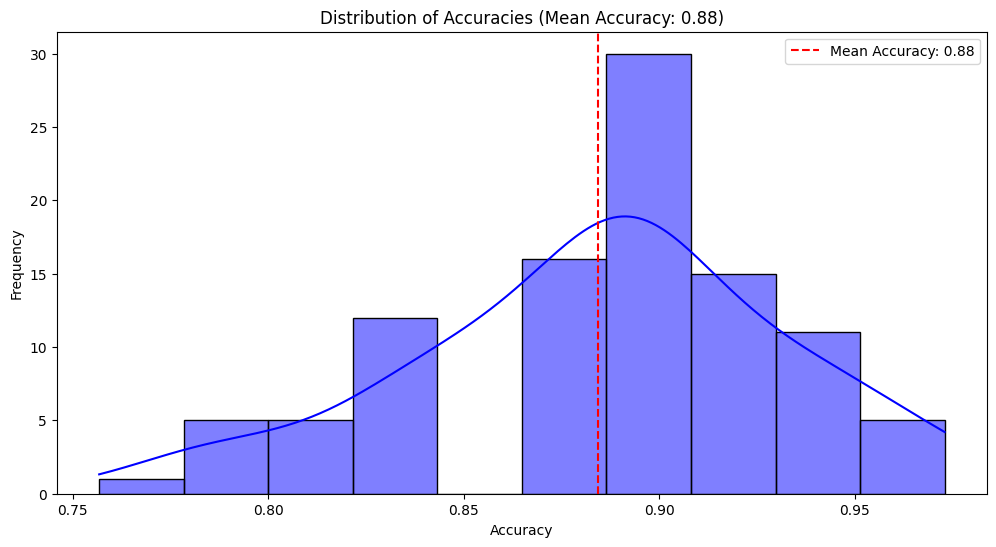

In [169]:
def run_iterations_and_plot_accuracies_with_pipeline(X, y, pipeline, num_iterations=100):
    accuracies = []

    for _ in range(num_iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)

        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)

        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)

    plt.figure(figsize=(12, 6))
    sns.histplot(accuracies, kde=True, color='blue')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Accuracies (Mean Accuracy: {np.mean(accuracies):.2f})')
    plt.axvline(x=np.mean(accuracies), color='red', linestyle='--', label=f'Mean Accuracy: {np.mean(accuracies):.2f}')
    plt.legend()
    plt.show()

    return accuracies

x_all = df_essay_copy[feature_columns]
y_all = df_essay_copy['AI Written']

tfidf_transformer = ColumnTransformer(
    transformers=[('tfidf', TfidfVectorizer(), 'N_Grams_Text')],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('tfidf_transformer', tfidf_transformer),
    ('classifier', RandomForestClassifier())
])

accuracies = run_iterations_and_plot_accuracies_with_pipeline(x_all, y_all, pipeline, num_iterations=100)


In [170]:
feature_columns = ['Readability', 'Percent SAT', 'Simplicity', 'Lexical Diversity', 'Burstiness', 'Average Sentence Length', 'Text Entropy']
X = df_essay[feature_columns]
y = df_essay['AI Written']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

predictions = classifier.predict(X_test)



              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.86      0.83      0.84        23

    accuracy                           0.81        37
   macro avg       0.80      0.81      0.80        37
weighted avg       0.81      0.81      0.81        37



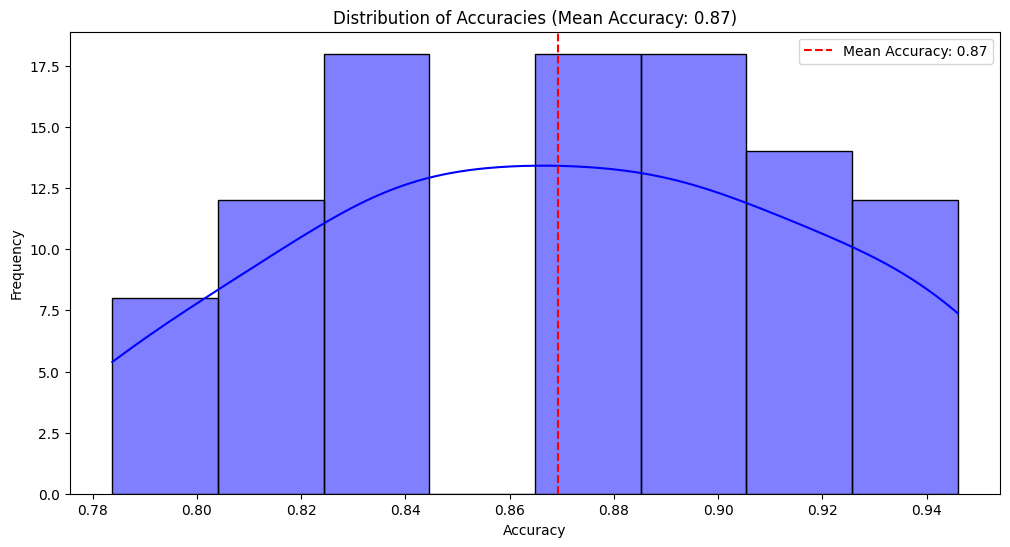

In [171]:
num_iterations = 100
accuracies = []

for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)  # random states
    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.figure(figsize=(12, 6))
sns.histplot(accuracies, kde=True, color='blue')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'Distribution of Accuracies (Mean Accuracy: {np.mean(accuracies):.2f})')
plt.axvline(x=np.mean(accuracies), color='red', linestyle='--', label=f'Mean Accuracy: {np.mean(accuracies):.2f}')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.89      0.76      0.82        21

    accuracy                           0.81        37
   macro avg       0.81      0.82      0.81        37
weighted avg       0.82      0.81      0.81        37



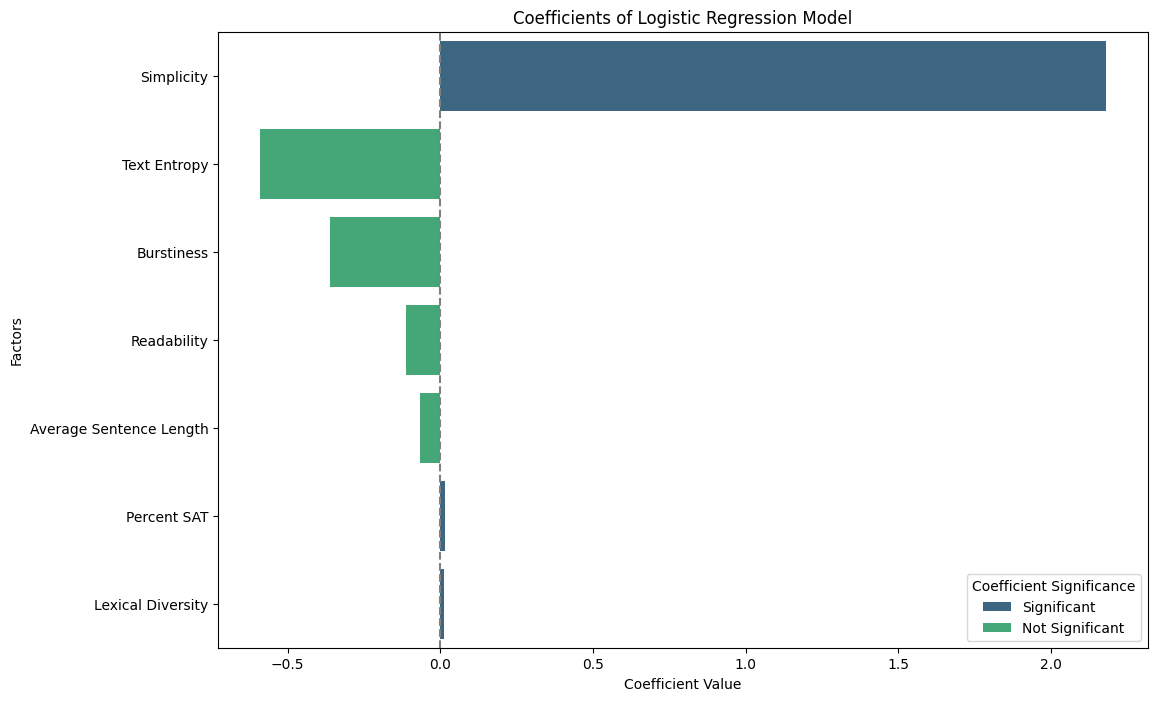

                   Factors  Coefficients     Significance
2               Simplicity      2.179190      Significant
6             Text Entropy     -0.589460  Not Significant
4               Burstiness     -0.360646  Not Significant
0              Readability     -0.111739  Not Significant
5  Average Sentence Length     -0.067676  Not Significant
1              Percent SAT      0.016713      Significant
3        Lexical Diversity      0.012713      Significant


In [172]:
X = df_essay[feature_columns]  # Independent variables
y = df_essay['AI Written']    # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

max_iterations = 1000
classifier = LogisticRegression(max_iter=max_iterations)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

coefficients = classifier.coef_[0]
intercept = classifier.intercept_[0]

viz_df = pd.DataFrame({
    'Factors': feature_columns,
    'Coefficients': coefficients
})

viz_df['Significance'] = np.where(viz_df['Coefficients'] >= 0, 'Significant', 'Not Significant')

viz_df = viz_df.reindex(viz_df['Coefficients'].abs().sort_values(ascending=False).index)

# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Coefficient Significance', loc='lower right')
plt.show()

print(viz_df)


In [173]:
#filter the training and testing data to include only significant features
significant_features = ['Simplicity', 'Percent SAT', 'Lexical Diversity']
X_train_filtered = X_train[significant_features]
X_test_filtered = X_test[significant_features]

classifier = RandomForestClassifier()
classifier.fit(X_train_filtered, y_train)

predictions = classifier.predict(X_test_filtered)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.74      0.67      0.70        21

    accuracy                           0.68        37
   macro avg       0.67      0.68      0.67        37
weighted avg       0.68      0.68      0.68        37



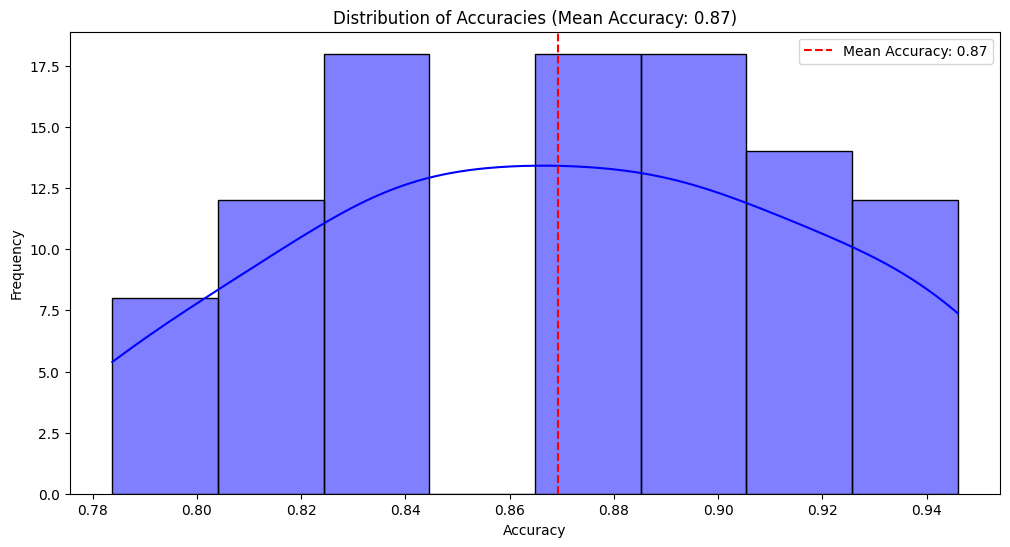

In [174]:
accuracies_filtered = []

for i in range(num_iterations):
    X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    classifier = RandomForestClassifier()
    classifier.fit(X_train_filtered, y_train)
    predictions = classifier.predict(X_test_filtered)
    accuracy_filtered = accuracy_score(y_test, predictions)
    accuracies_filtered.append(accuracy)

plt.figure(figsize=(12, 6))
sns.histplot(accuracies, kde=True, color='blue')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'Distribution of Accuracies (Mean Accuracy: {np.mean(accuracies):.2f})')
plt.axvline(x=np.mean(accuracies), color='red', linestyle='--', label=f'Mean Accuracy: {np.mean(accuracies):.2f}')
plt.legend()
plt.show()

In [175]:
tfidf_essay = TfidfVectorizer()
X_essay_text = tfidf_essay.fit_transform(df_essay['Essay Text'].fillna(''))

categorical_features = ['GPTZero Prediction', 'ContentDetectorAI Prediction']
ohe = OneHotEncoder()
X_categorical = ohe.fit_transform(df_essay[categorical_features])

numerical_features = ['Readability', 'Percent SAT', 'Simplicity', 'Lexical Diversity', 'Burstiness', 'Average Sentence Length']
X_numerical = df_essay[numerical_features].to_numpy()

# Combine all features
X_combined = np.hstack((X_categorical.toarray(), X_essay_text.toarray(), X_numerical))
y = df_essay['AI Written'].to_numpy()

X_train, X_valid, y_train, y_valid = train_test_split(X_combined, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

predictions_valid = classifier.predict(X_valid)
print("Classification Report on Validation Set:")
print(classification_report(y_valid, predictions_valid))


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.79      0.92      0.85        12

    accuracy                           0.89        37
   macro avg       0.87      0.90      0.88        37
weighted avg       0.90      0.89      0.89        37



<Figure size 1200x600 with 0 Axes>

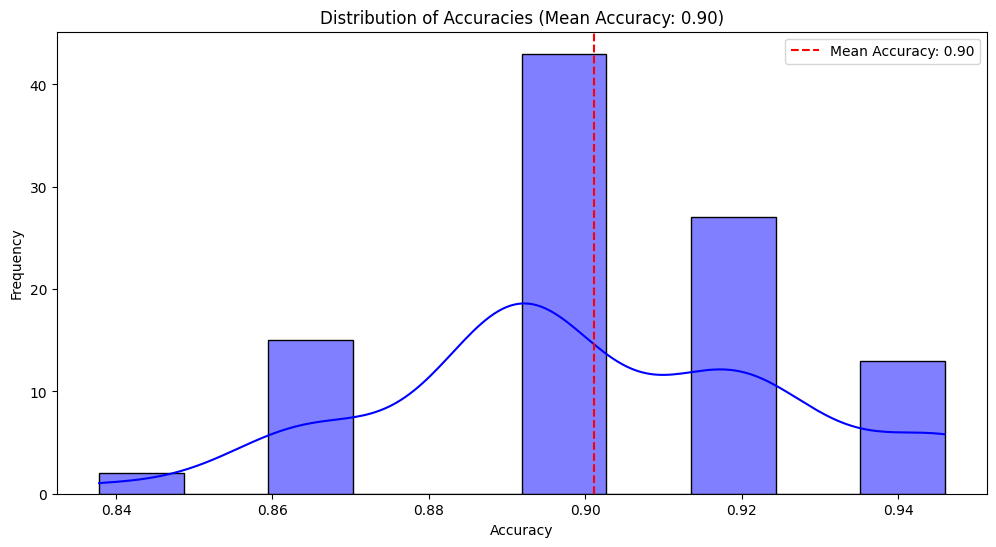

In [177]:

accuracies = []

for _ in range(100):
    tfidf_essay = TfidfVectorizer()
    X_essay_text = tfidf_essay.fit_transform(df_essay['Essay Text'].fillna(''))

    categorical_features = ['GPTZero Prediction', 'ContentDetectorAI Prediction']
    ohe = OneHotEncoder()
    X_categorical = ohe.fit_transform(df_essay[categorical_features])
    numerical_features = ['Readability', 'Percent SAT', 'Simplicity', 'Lexical Diversity', 'Burstiness', 'Average Sentence Length']
    X_numerical = df_essay[numerical_features].to_numpy()
    
    X_combined = np.hstack((X_categorical.toarray(), X_essay_text.toarray(), X_numerical))
    y = df_essay['AI Written'].to_numpy()

    X_train, X_valid, y_train, y_valid = train_test_split(X_combined, y, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=_)
    classifier.fit(X_train, y_train)

    predictions_valid = classifier.predict(X_valid)
    accuracy = np.mean(predictions_valid == y_valid)
    
    accuracies.append(accuracy)

plt.figure(figsize=(12, 6))
sns.histplot(accuracies, kde=True, color='blue')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'Distribution of Accuracies (Mean Accuracy: {np.mean(accuracies):.2f})')
plt.axvline(x=np.mean(accuracies), color='red', linestyle='--', label=f'Mean Accuracy: {np.mean(accuracies):.2f}')
plt.legend()
plt.show()

Testing Subject

In [ ]:
detectors = ['GPTZero Score', 'ContentDetectorAI Score', 'GPT2 Score', 'AcademicHelp Score']

# DataFrame to store average scores for each subject and detector
average_scores_by_subject = pd.DataFrame()

# Analyze each detector's average score across different subjects
for detector in detectors:
    average_scores = df_essay.groupby('Subject')[detector].mean()
    average_scores_by_subject[detector] = average_scores

# Resetting index to turn subjects into a column
average_scores_by_subject.reset_index(inplace=True)

# Display the results
print(average_scores_by_subject)

      Subject  GPTZero Score  ContentDetectorAI Score  GPT2 Score  \
0   Economics      30.666667                70.686667   16.686667   
1     English      54.711111                44.967955   19.679556   
2     History      46.294118                43.713824   11.763939   
3       Other      58.523810                54.237381   11.337143   
4  Technology      68.352941                49.811176   14.015294   

   AcademicHelp Score  
0           20.613333  
1           28.200000  
2           30.480882  
3           38.924048  
4           34.950588  


            Readability  Percent SAT  Simplicity  Lexical Diversity  \
Subject                                                               
Economics     73.105658    80.039725    0.162157          55.329069   
English       46.423579    72.682866    0.296555          38.868878   
History       53.631021    71.155707    0.316646          39.239147   
Other         44.413663    72.642280    0.381381          42.603664   
Technology    48.744237    72.430707    0.368765          42.228851   

            Burstiness  Average Sentence Length  Text Entropy  AI Written  \
Subject                                                                     
Economics     7.196141                16.683550      5.094442    0.333333   
English       9.525351                25.750694      7.442694    0.466667   
History       9.689586                24.484219      7.337386    0.382353   
Other         9.113380                25.381958      7.242735    0.559524   
Technology    8.482304                23

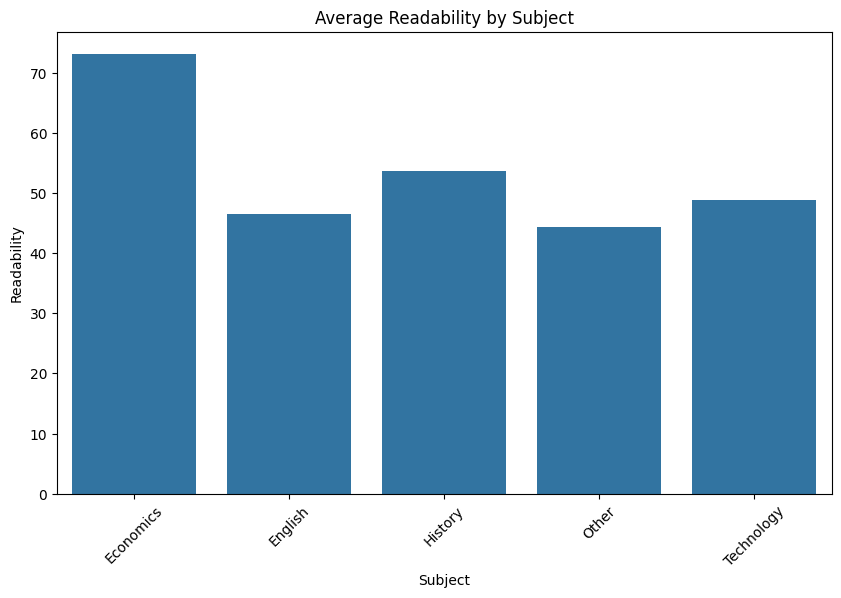

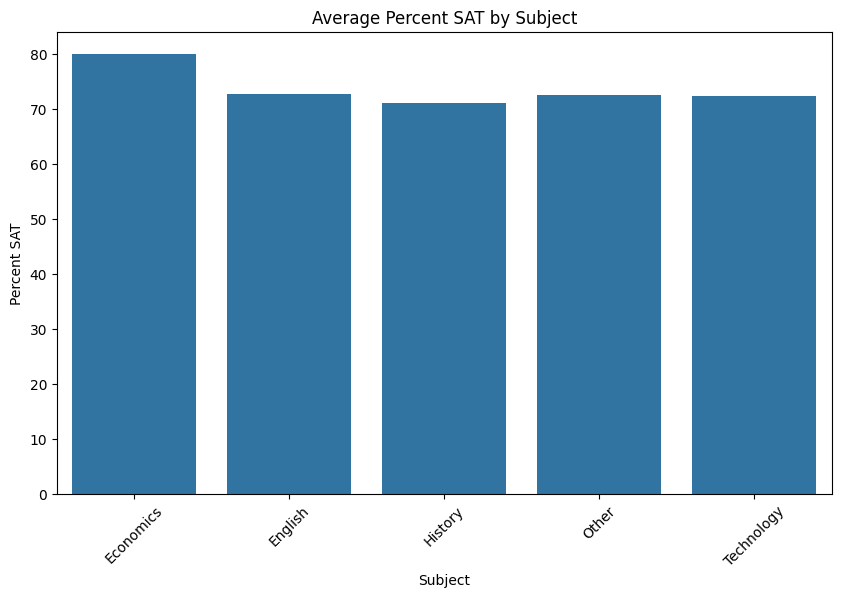

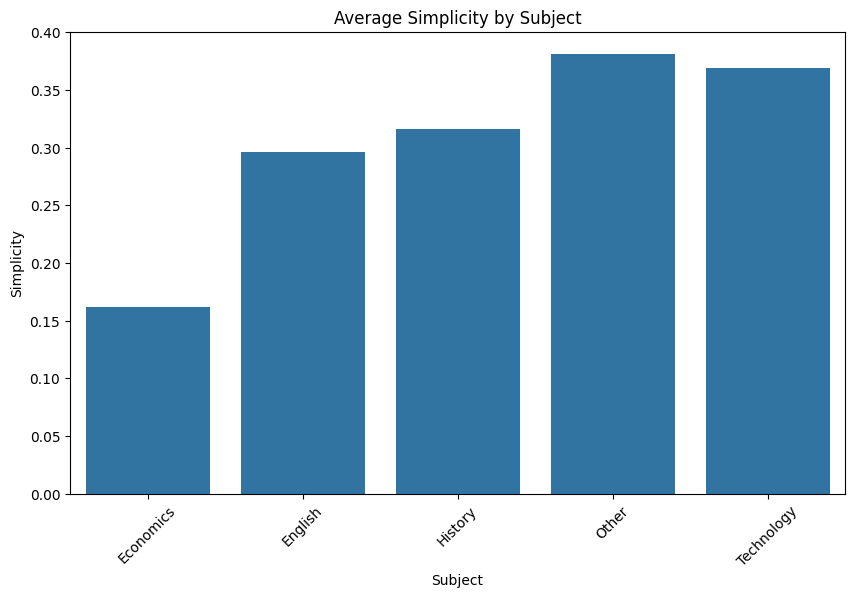

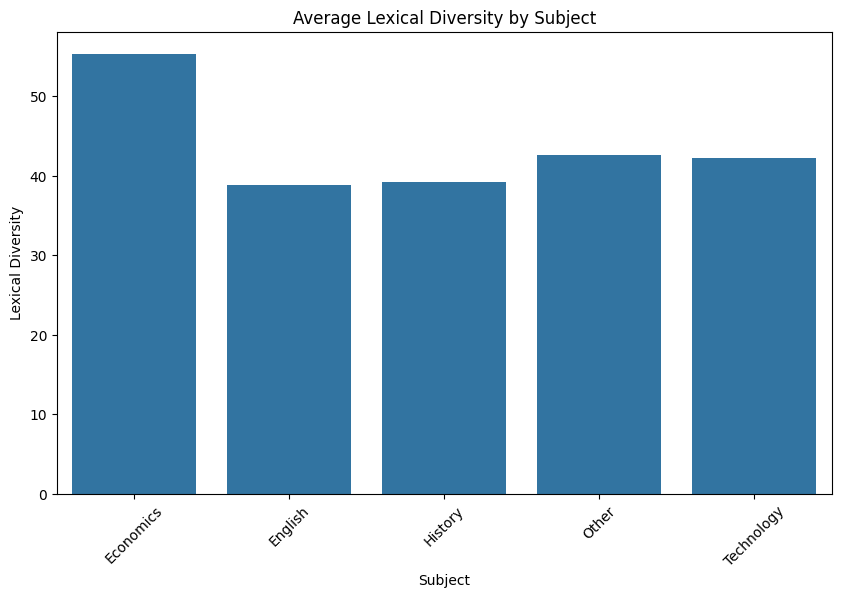

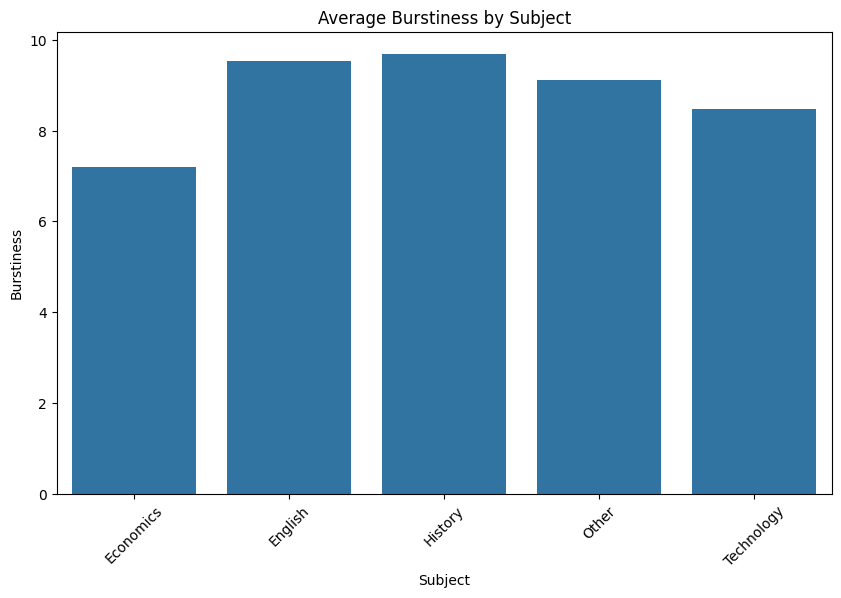

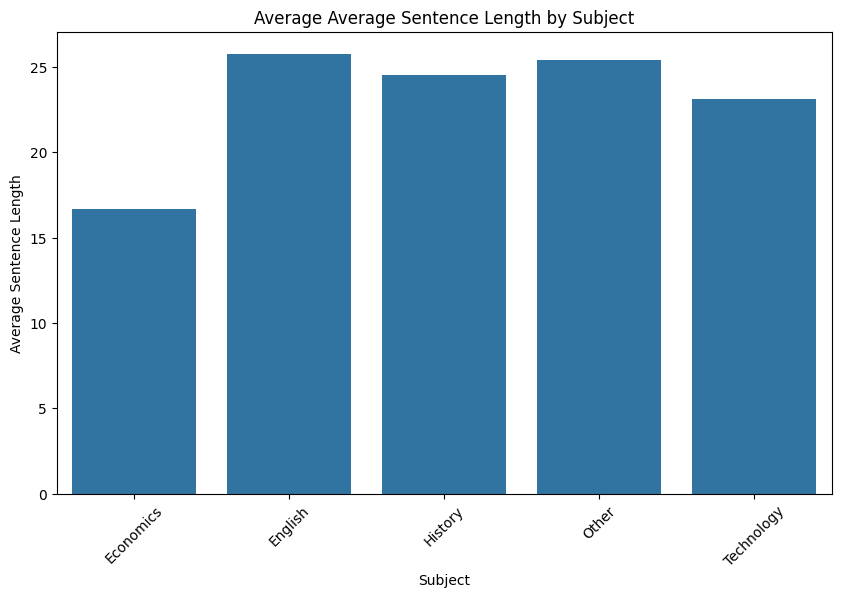

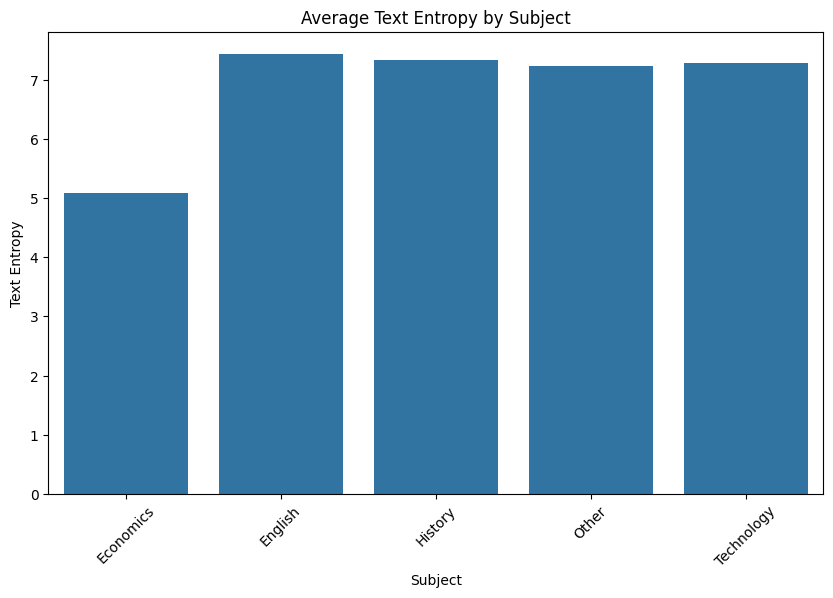

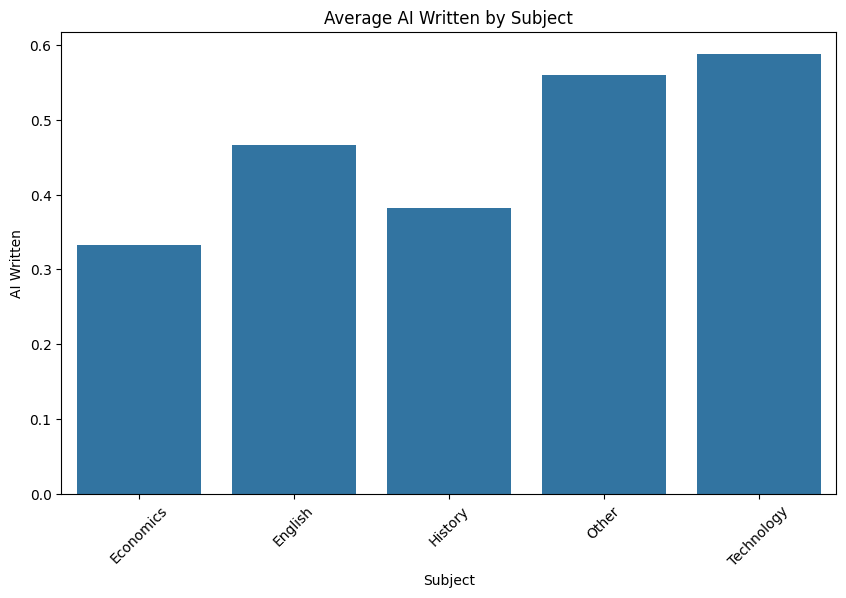

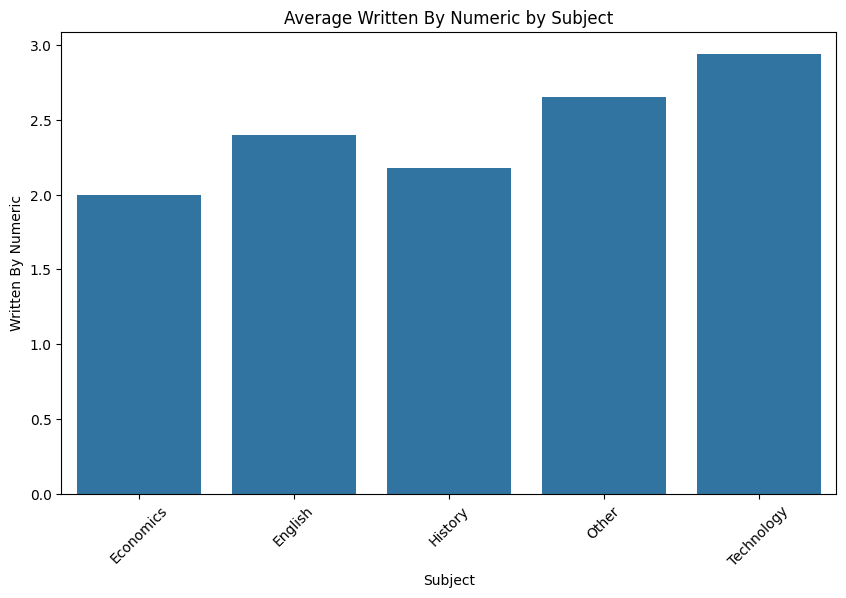

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics to analyze
metrics = ['Readability', 'Percent SAT', 'Simplicity', 'Lexical Diversity', 
           'Burstiness', 'Average Sentence Length', 'Text Entropy', 
            'AI Written', 'Written By Numeric']

# Calculate summary statistics for each metric within each subject
summary_stats = df_essay.groupby('Subject')[metrics].mean()

# Display the summary statistics
print(summary_stats)

# Graphs for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=summary_stats.index, y=summary_stats[metric])
    plt.title(f'Average {metric} by Subject')
    plt.ylabel(metric)
    plt.xlabel('Subject')
    plt.xticks(rotation=45)
    plt.show()


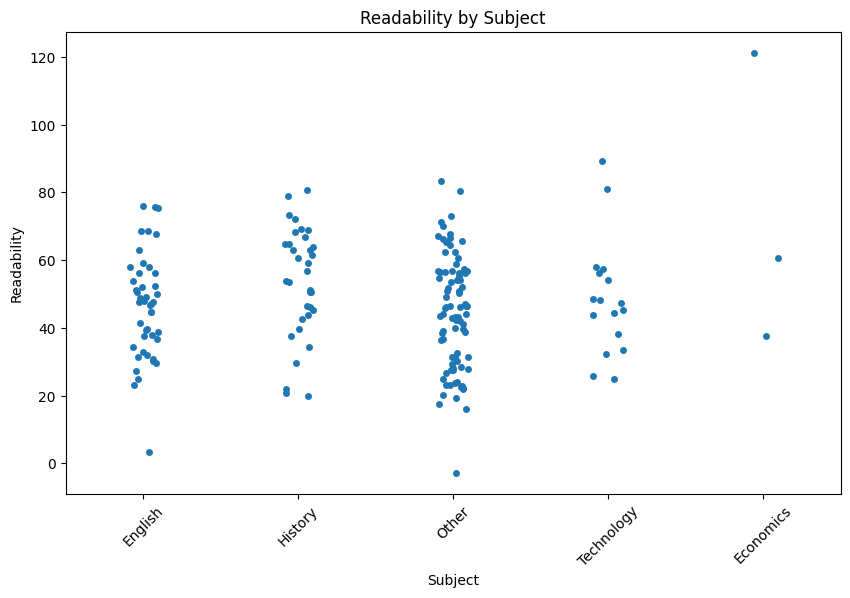

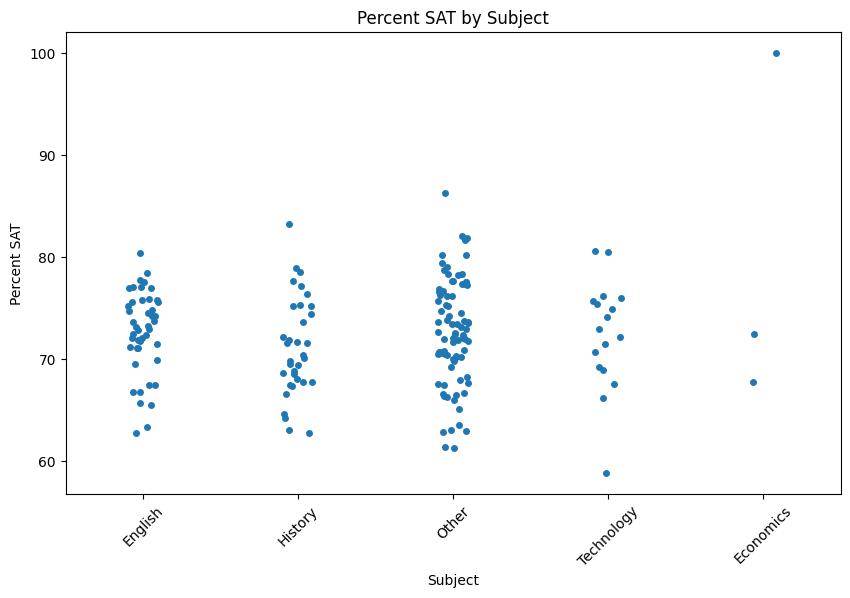

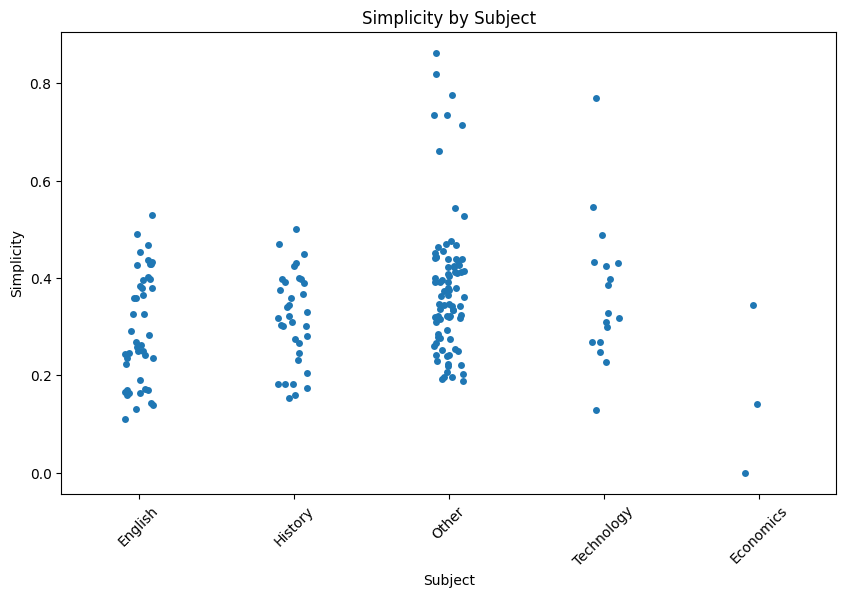

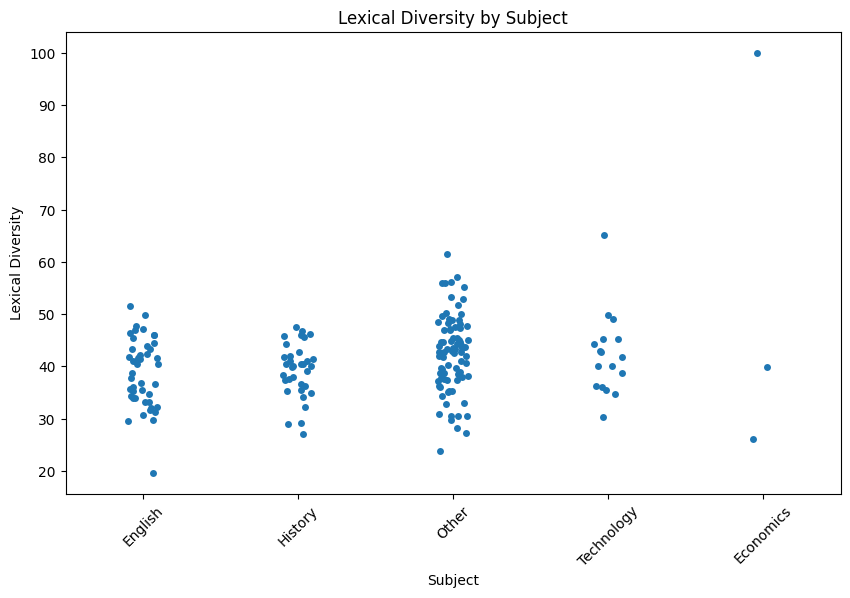

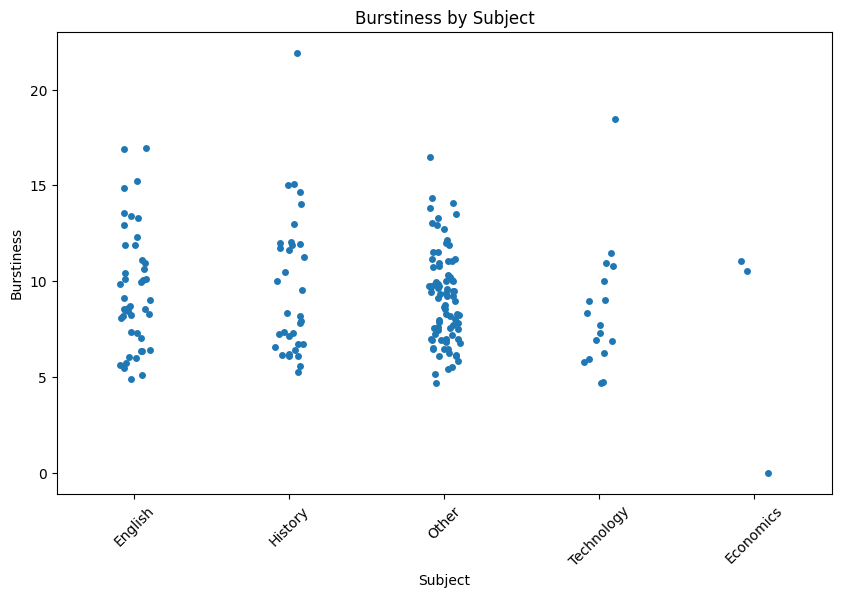

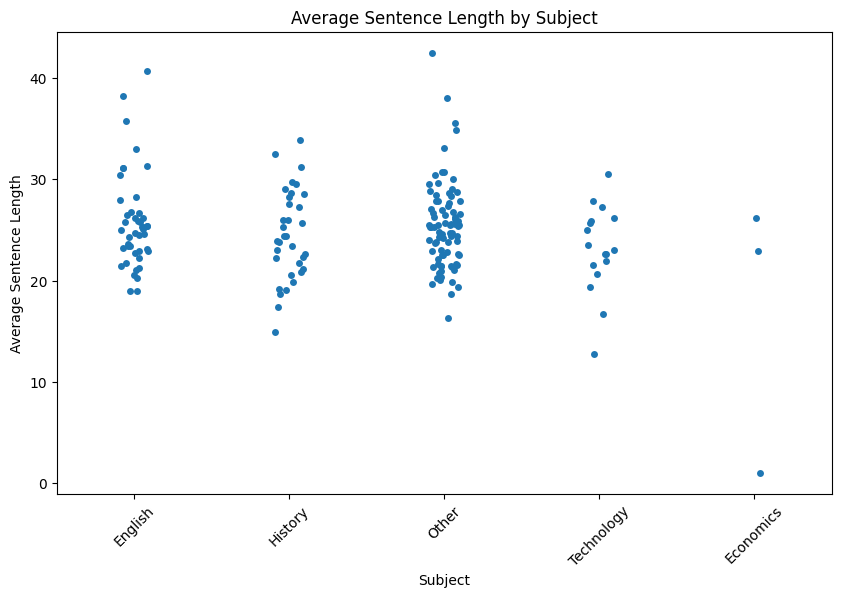

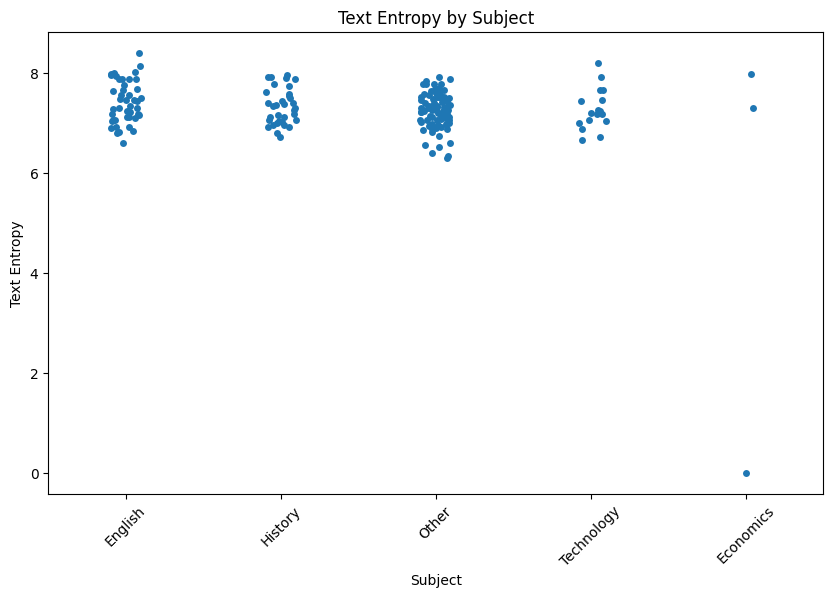

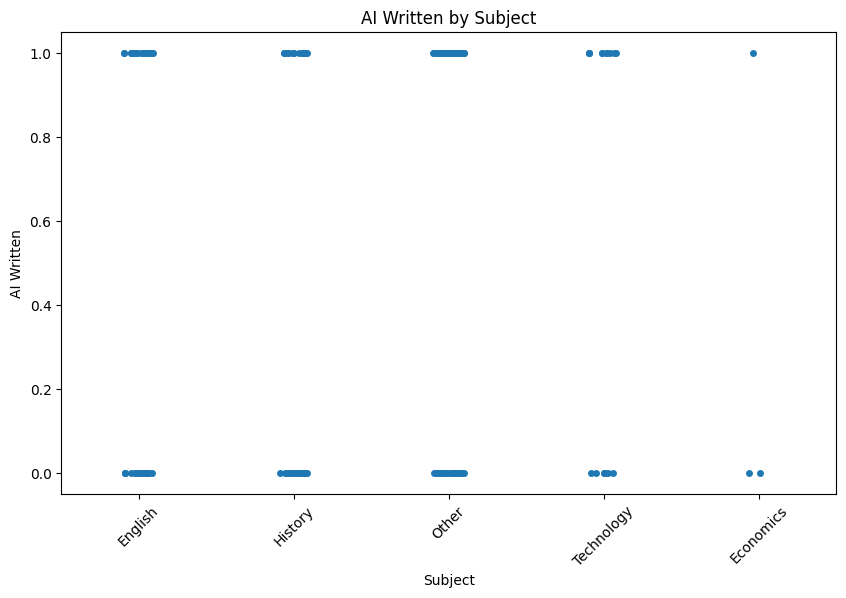

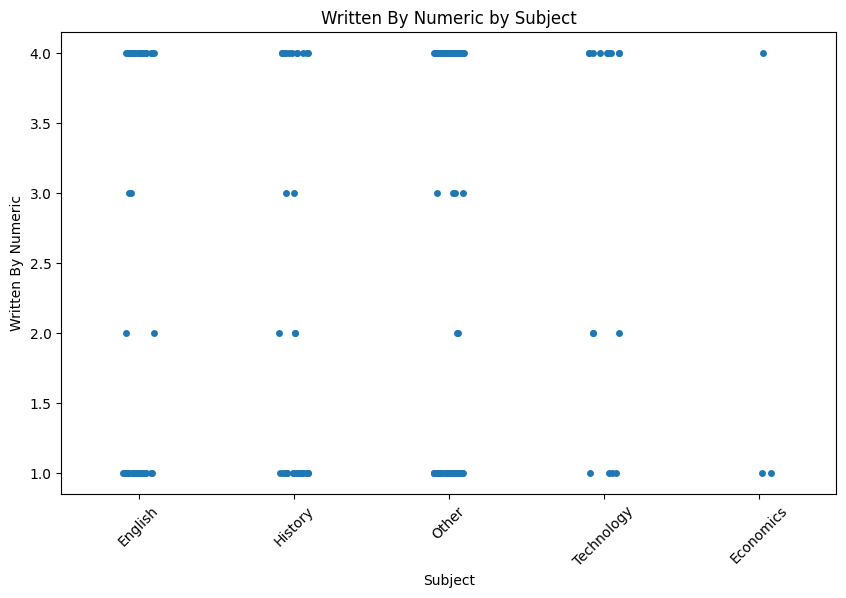

In [ ]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='Subject', y=metric, data=df_essay, jitter=True)
    plt.title(f'{metric} by Subject')
    plt.ylabel(metric)
    plt.xlabel('Subject')
    plt.xticks(rotation=45)
    plt.show()

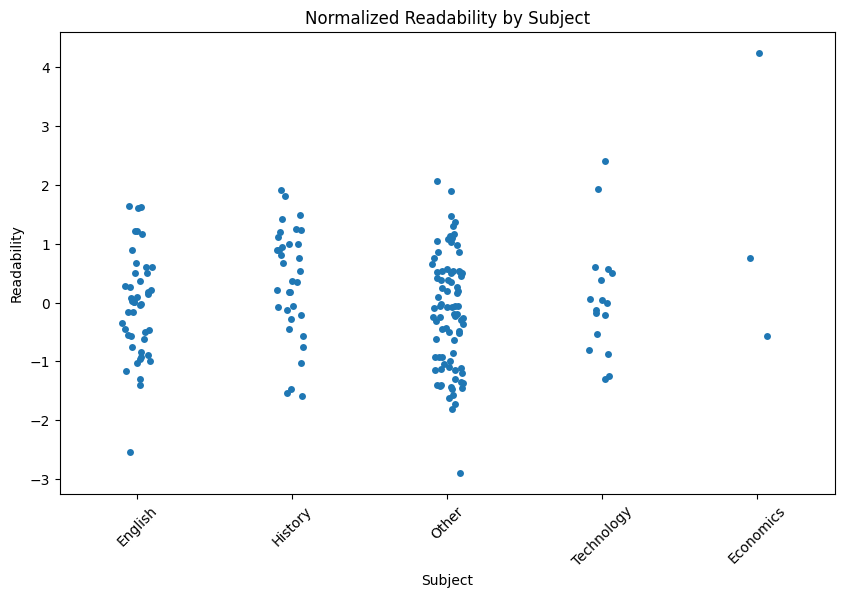

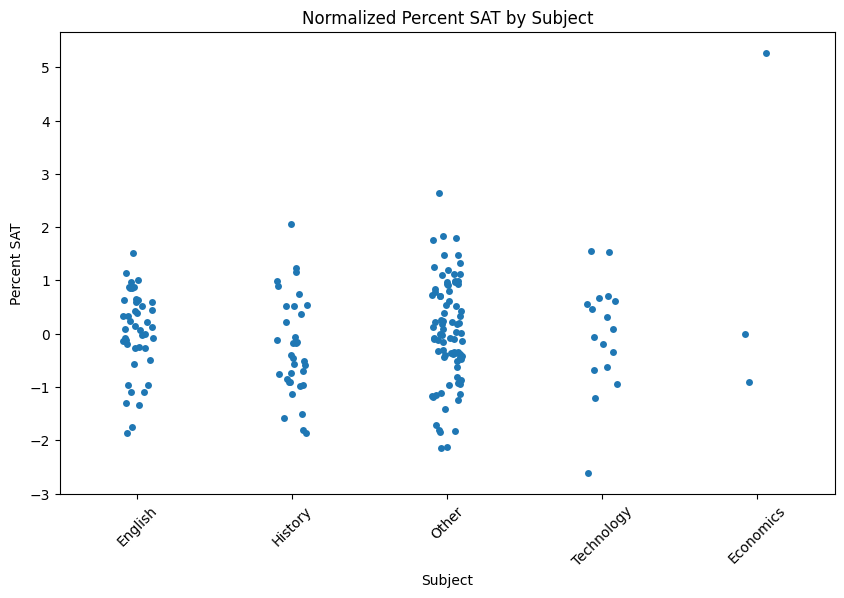

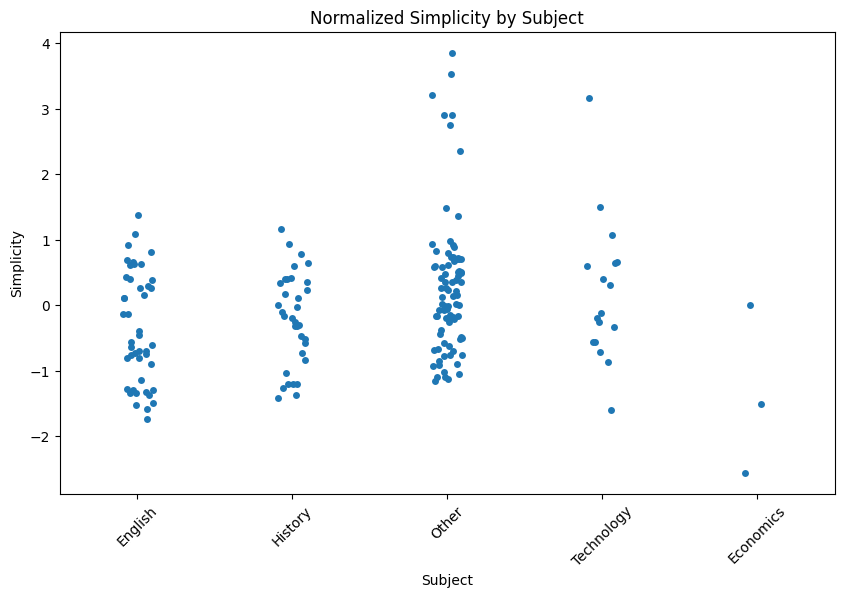

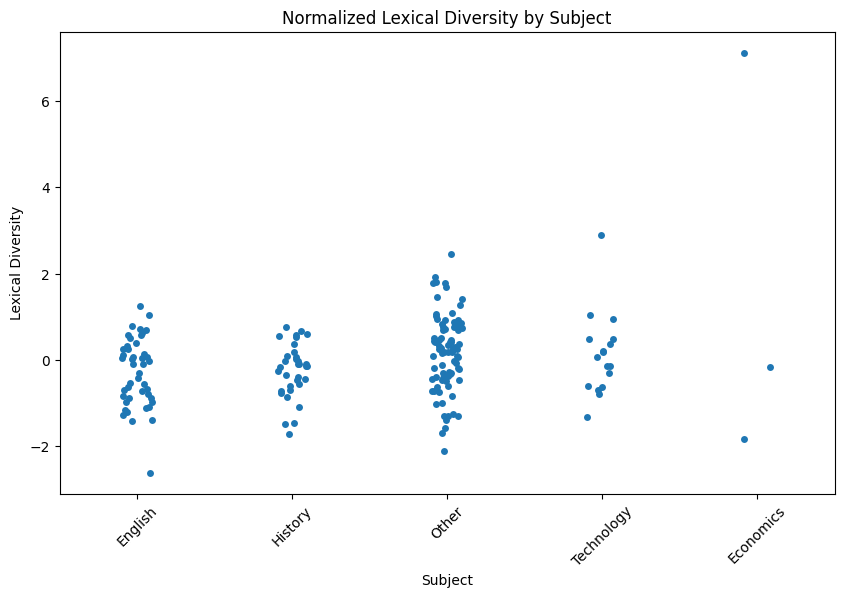

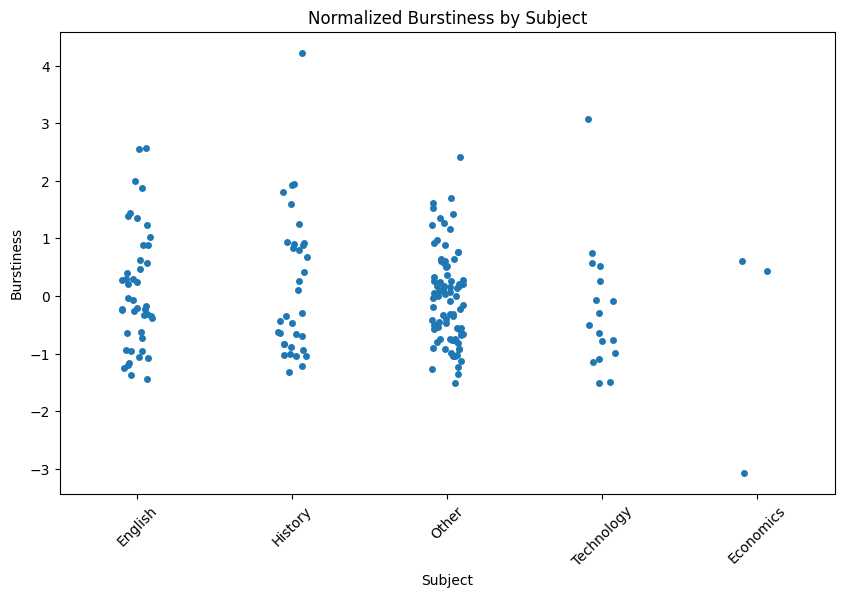

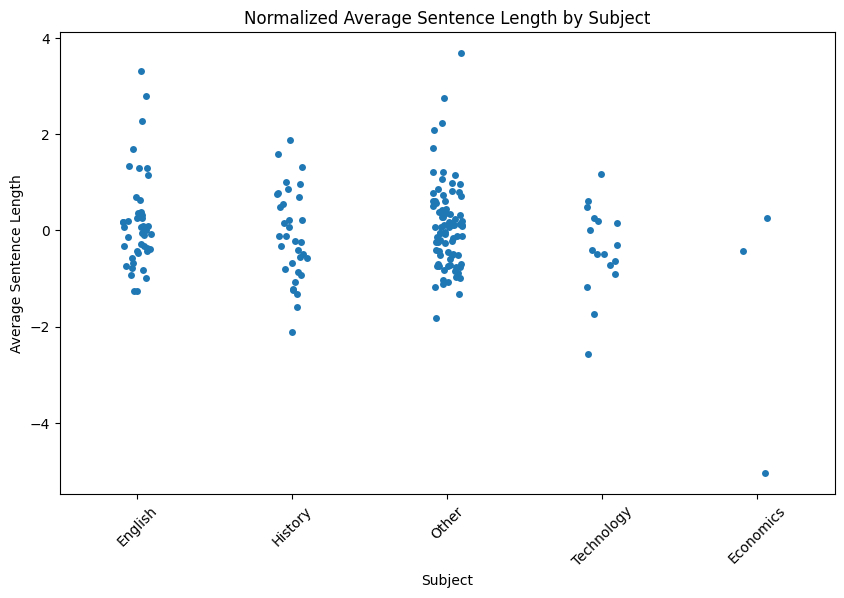

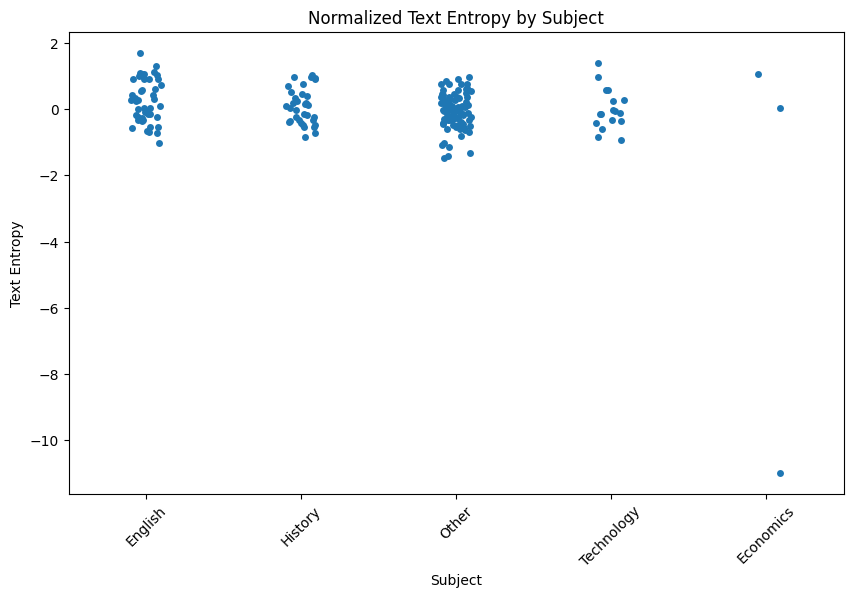

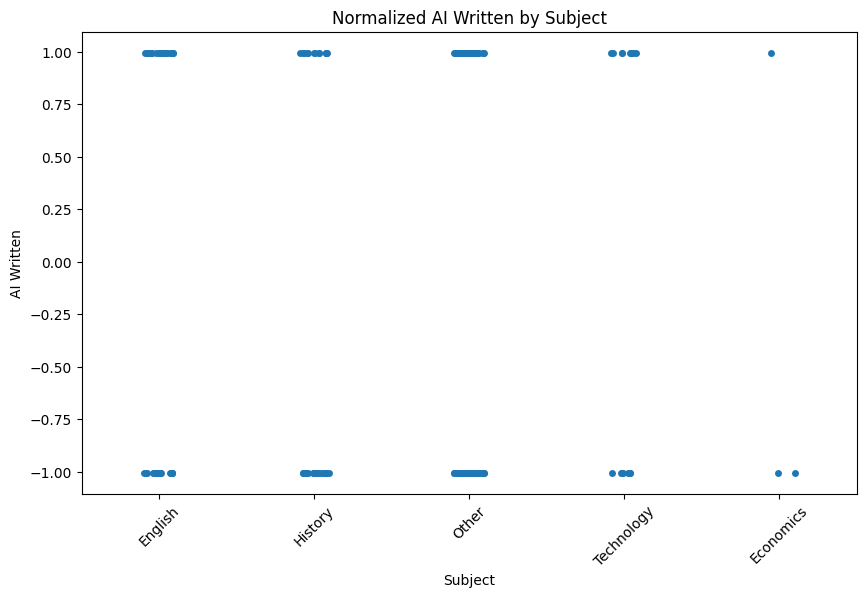

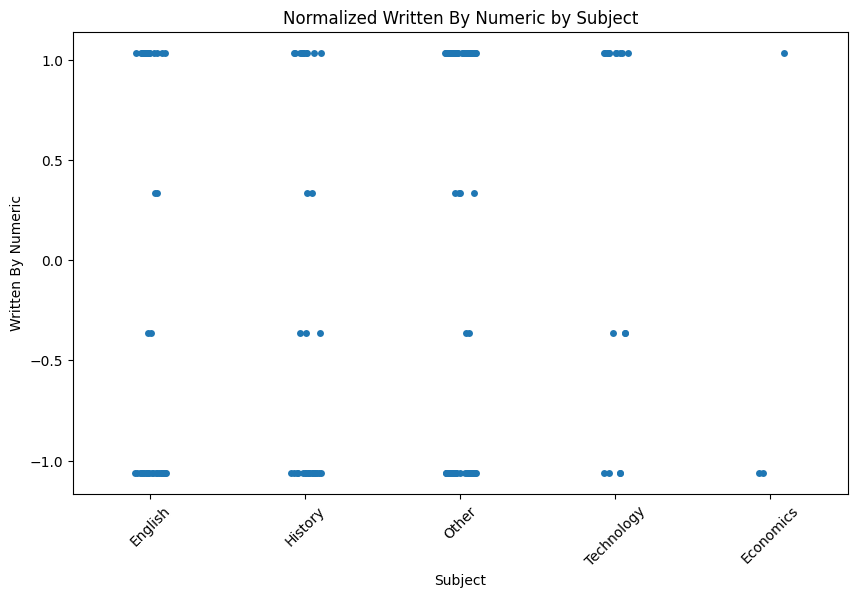

In [ ]:
from sklearn.preprocessing import StandardScaler

# Metrics to analyze
metrics = ['Readability', 'Percent SAT', 'Simplicity', 'Lexical Diversity', 
           'Burstiness', 'Average Sentence Length', 'Text Entropy', 
           'AI Written', 'Written By Numeric']

# Creating a copy of the dataset for normalization
df_normalized = df_essay.copy()

# Normalizing the metrics
scaler = StandardScaler()
df_normalized[metrics] = scaler.fit_transform(df_essay[metrics])

# Create a strip plot for each normalized metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='Subject', y=metric, data=df_normalized, jitter=True)
    plt.title(f'Normalized {metric} by Subject')
    plt.ylabel(metric)
    plt.xlabel('Subject')
    plt.xticks(rotation=45)
    plt.show()
